In [1]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quite


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os


import plotly.express as px

%matplotlib inline

In [4]:
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

#  Data Preparation

In [6]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')

In [6]:
customer.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
customer.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

# Missing Values 

Let's check if there are any missing values in the data

In [9]:
missing_values = customer.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

***Insights:***
The Income column has some missing data. Let's drop the rows in the data with missing values

In [10]:
customer = customer.dropna()

# Age of Customers 

Let's calculate the age of every customer from the birth year of customers. Since the customers enrollment with the company between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.

In [11]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

# Total Spendings 

The customer's spendings are given separately for different products. Let's sum them up to calculate the total spendings of the customers

In [12]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

# Age Groups 
On the basis of Age let's divide the customers into different age groups

In [13]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

#  Marital Status

The Marital Status column has different string values: Together, Married, Divorced, Widow, Alone, Absurd, YOLO. Most of them fall under the same category. So let's represent the marital status of customers based on 2 main categories i.e. Partner and Single

In [14]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

# Removing Outliers 

outliers in the Age and Income columns

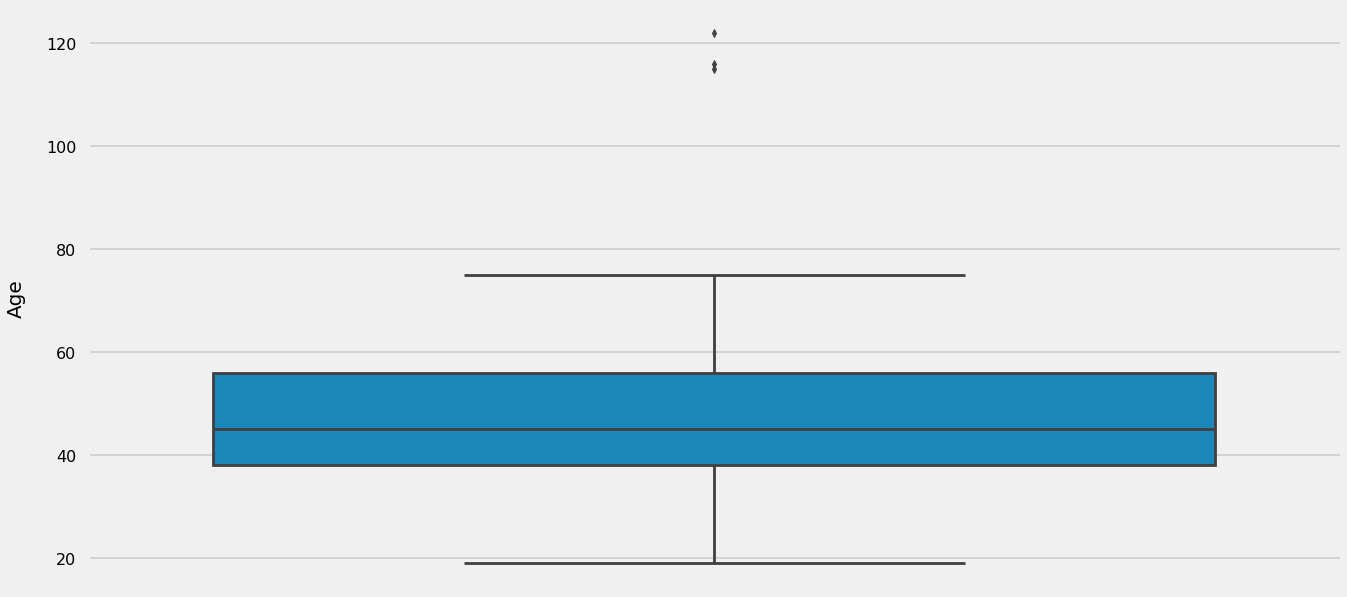

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

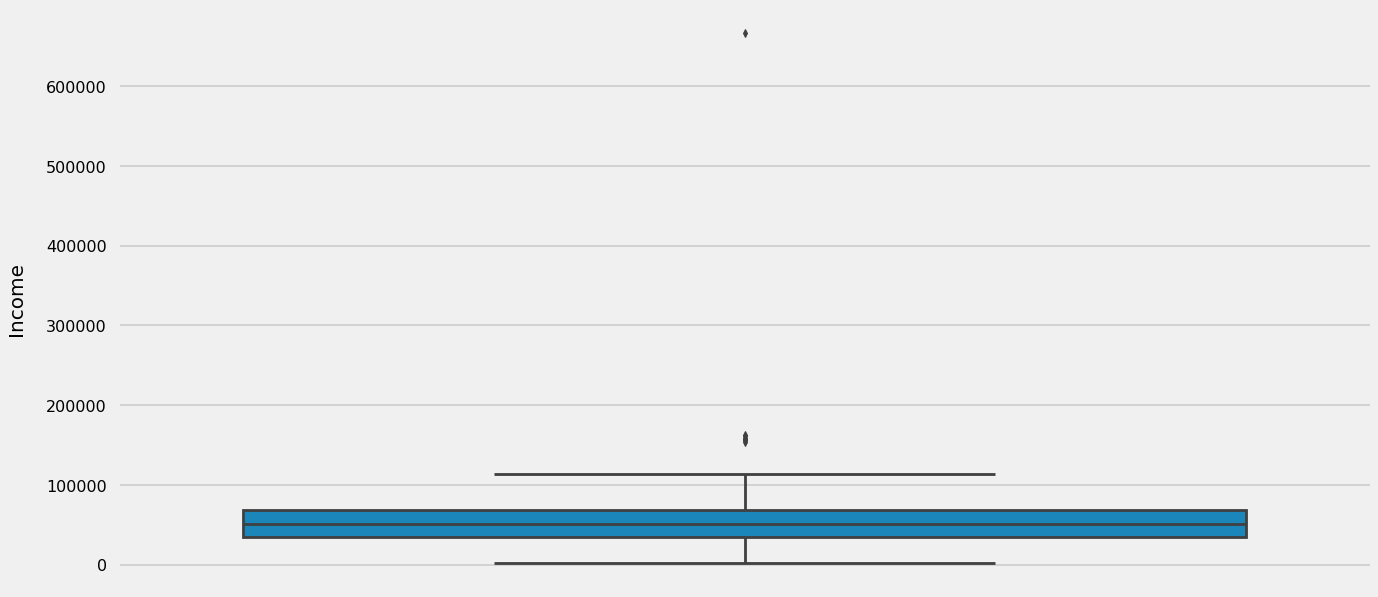

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(y=customer.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

In [17]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

# 2. Exploratory Data Analysis 

#  Marital Status

In [18]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

***Insights:*** 

2/3rd of the customers are living with partners while about 1/3rd are singles

# Average Spendings: Marital Status Wise

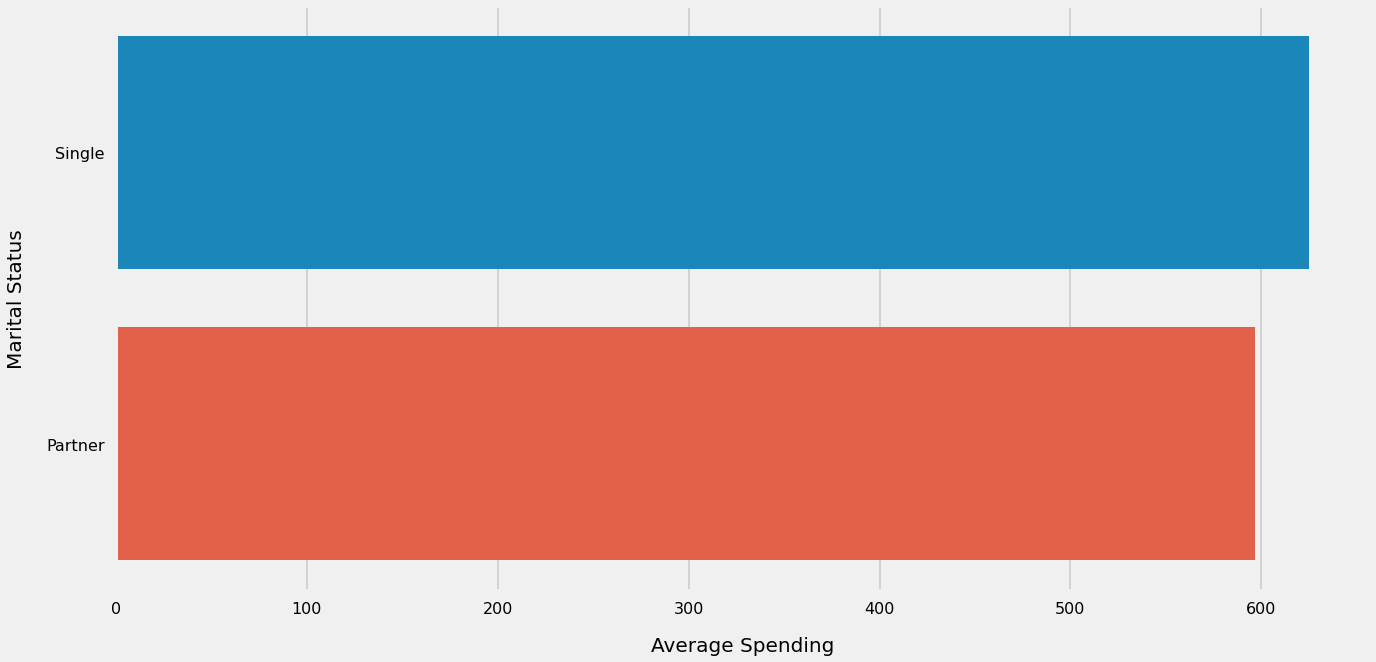

In [19]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

***Insights:***

Despite being the minority, the Singles spent more money on the average as compared to the customers having partners

#  Education Level 

In [20]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

***Insights:***

1. Half of the customers are University graduates
2. There are more customers who hold PhD degrees than the customers who did Masters

# Age Distribution of Customers 

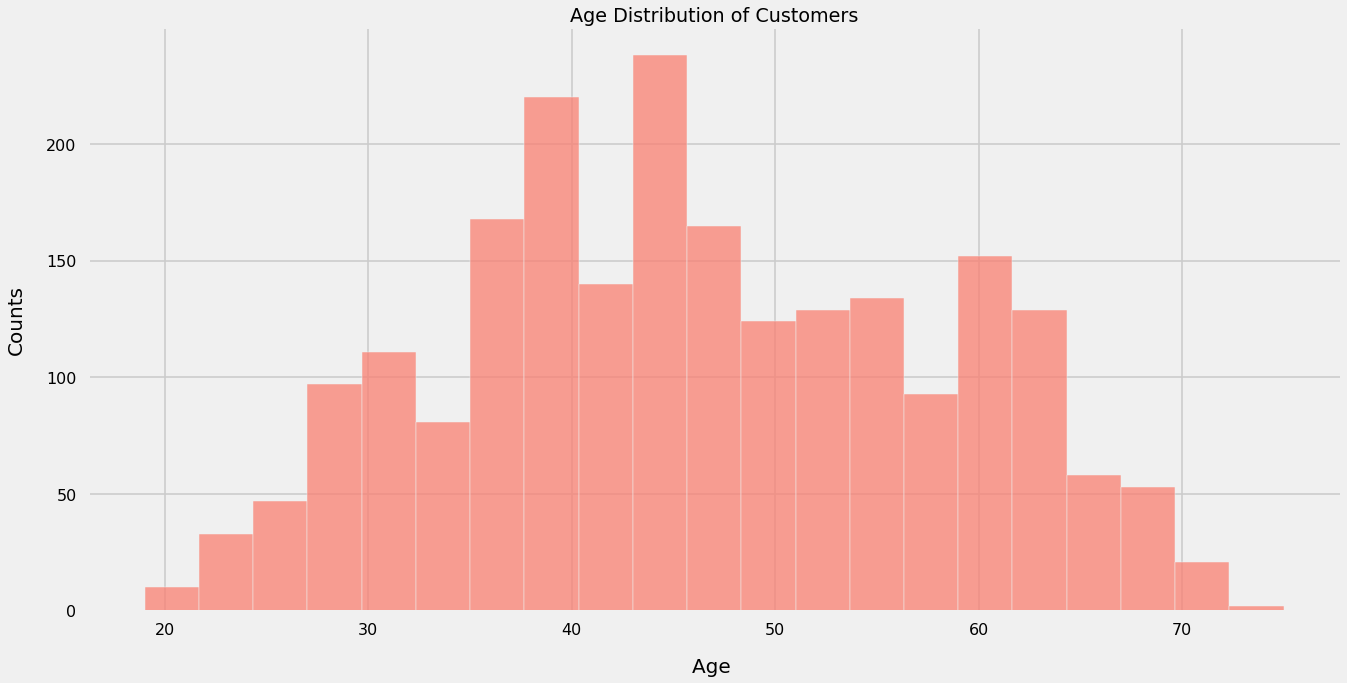

In [21]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

***Insights:***

Age of the customers is nearly normally distributed, with most of the customers aged between 40 and 60

# Relationship: Age vs Spendings

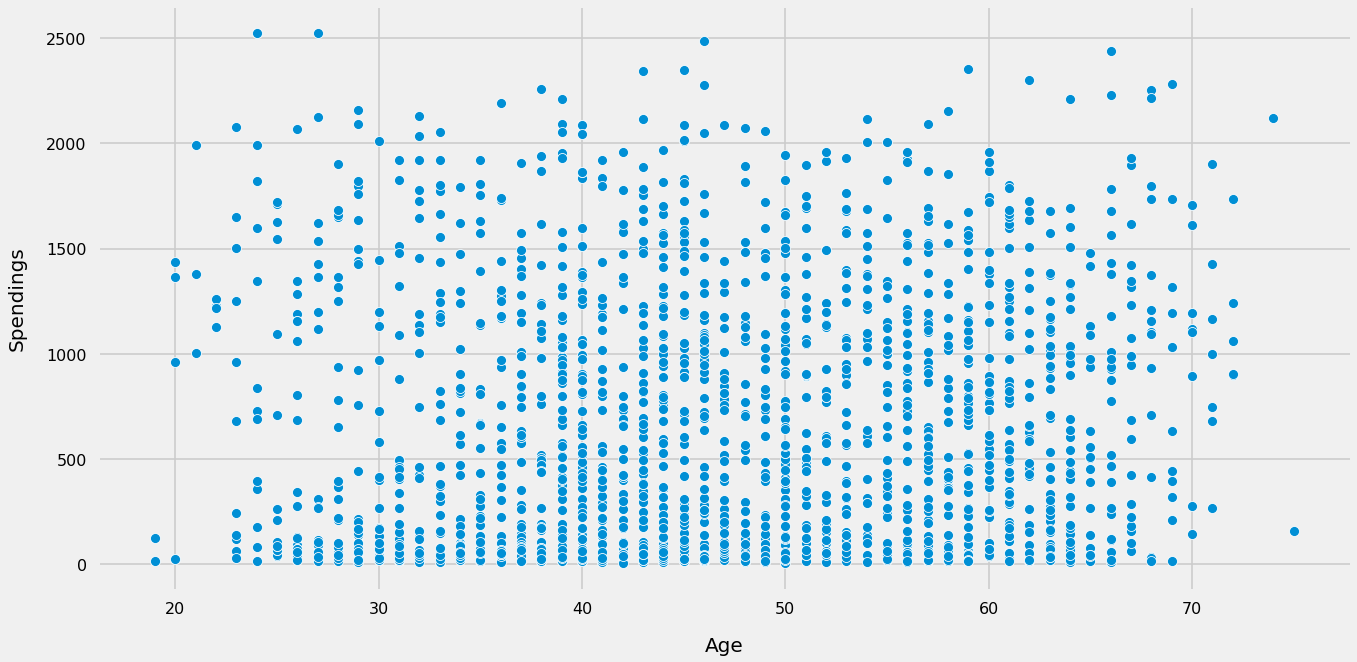

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

***Insights:***

There doesn't seem to be any clear relationship between age of customers and their spending habits

# Customers Segmentation: Age Group Wise 

In [23]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

***Insights:***

1. More than 50% of the customers are Middle Age Adults aged between 40 and 60
2. The 2nd famous age category is Adult, aged between 20 and 40

# Average Spendings: Age Group Wise 

In [24]:
#Unique values in AgeGroup columns
customer['AgeGroup'].value_counts()

Middle Age Adult    1160
Adult                683
Senior Adult         312
Teen                   2
Name: AgeGroup, dtype: int64

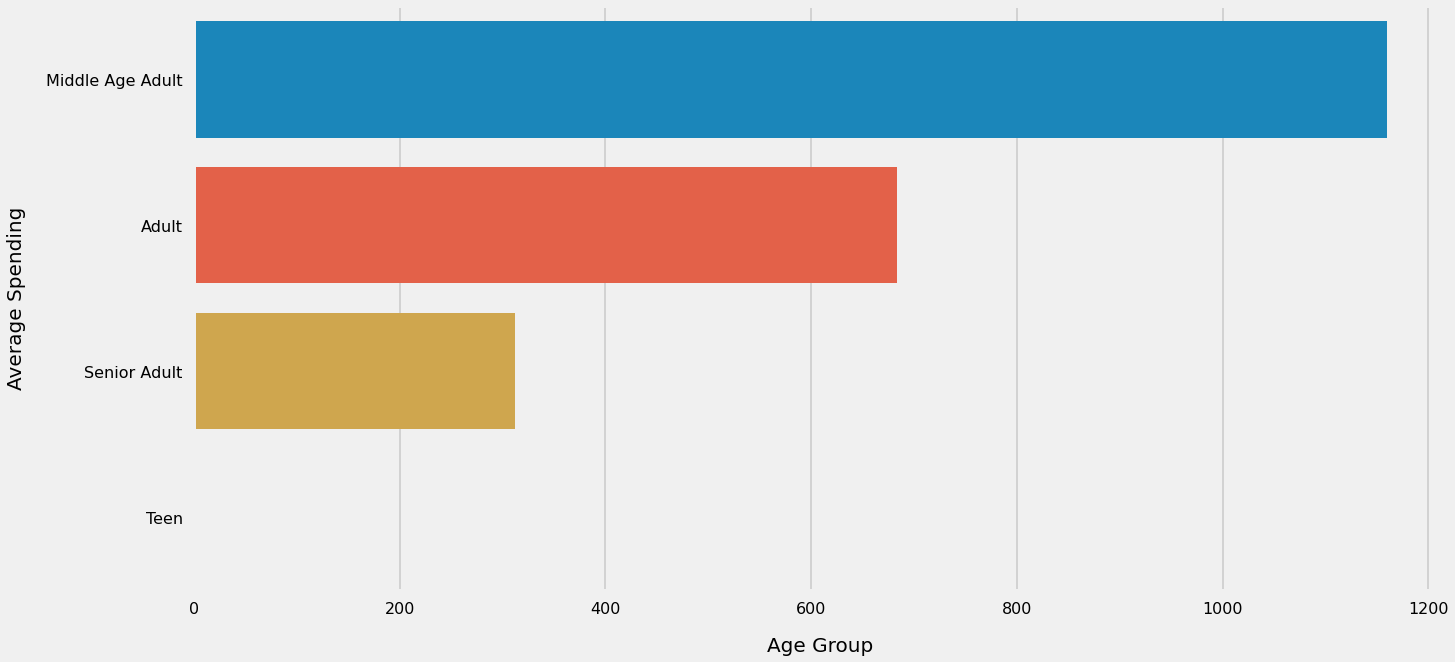

In [25]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

# Income Distribution of Customers 

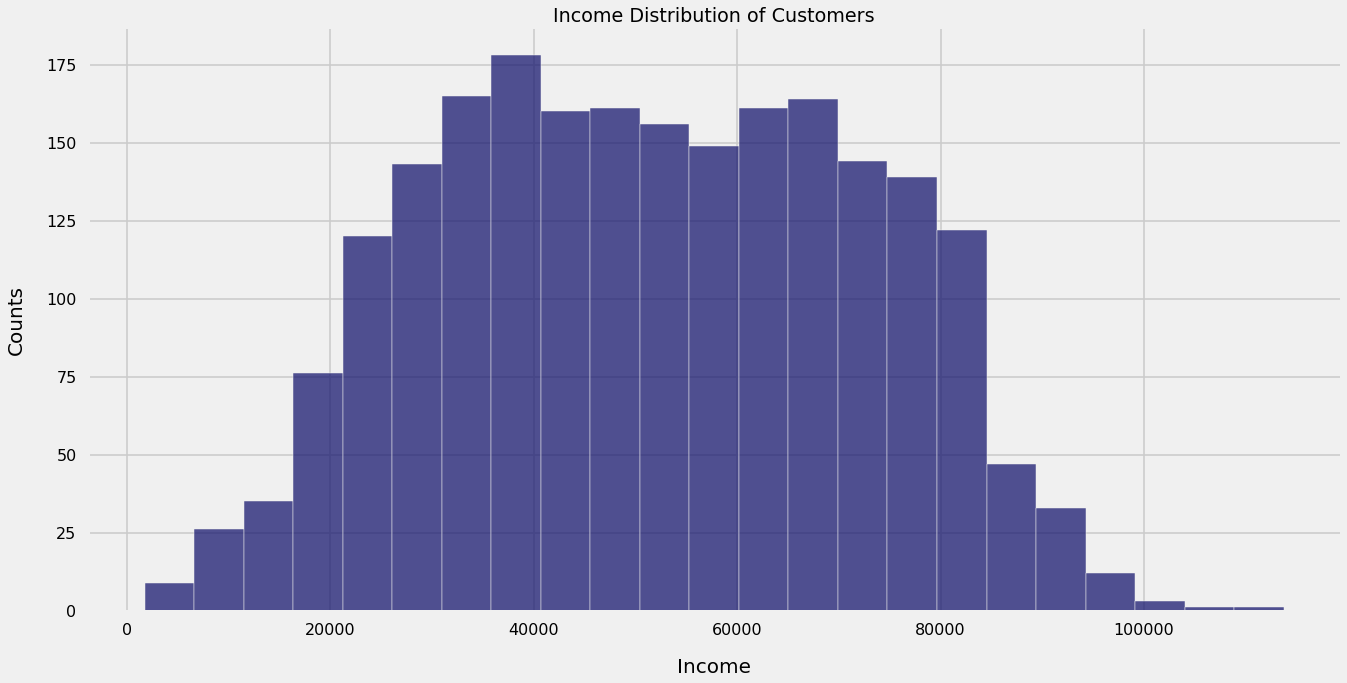

In [26]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = customer.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

***Insights:***

The salaries of the customers have normal distribution with most of the customers earning between 25000 and 85000

#  Relationship: Income vs Spendings

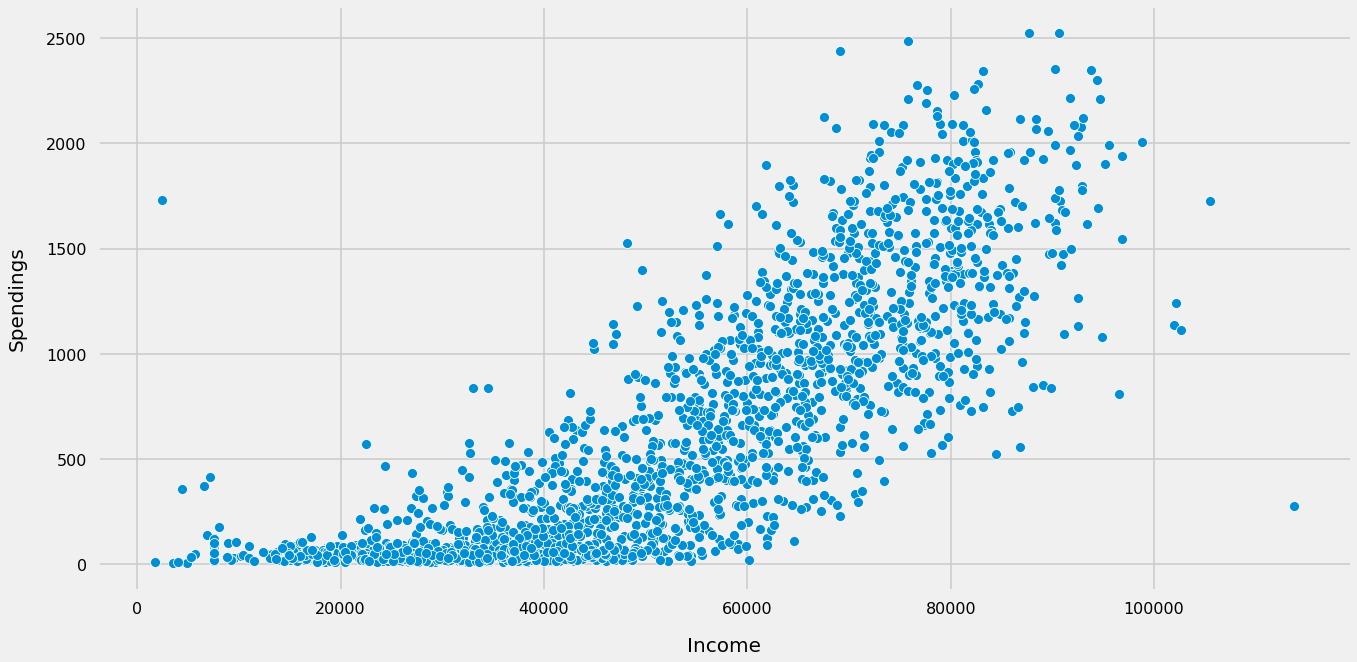

In [27]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

(0.0, 2682.405521996635)

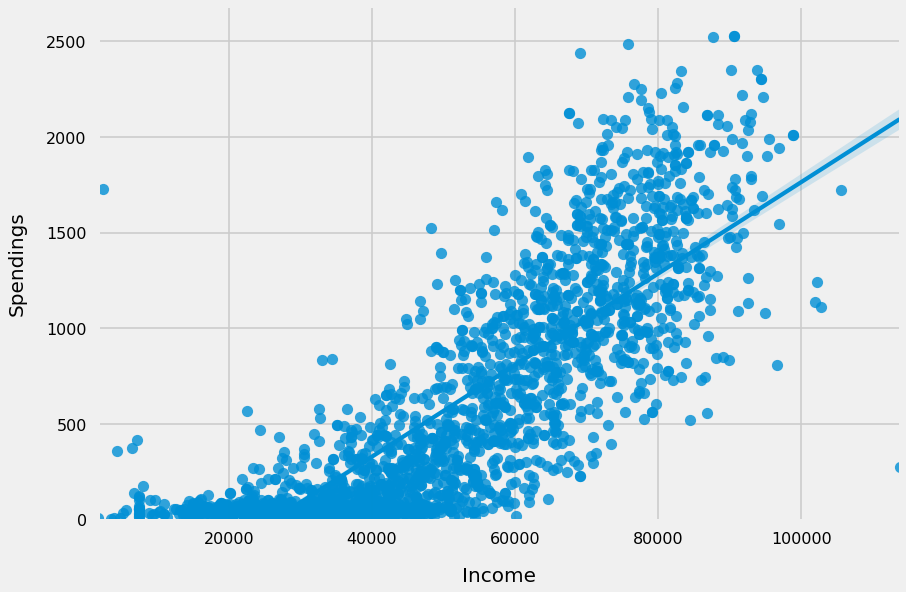

In [28]:
sns.regplot(x=customer.Income, y=customer.TotalSpendings,data=customer)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.ylim(0,)

***Insights:***

The relationship is linear. Customers having higher salaries are spending more

# Most Bought Products 

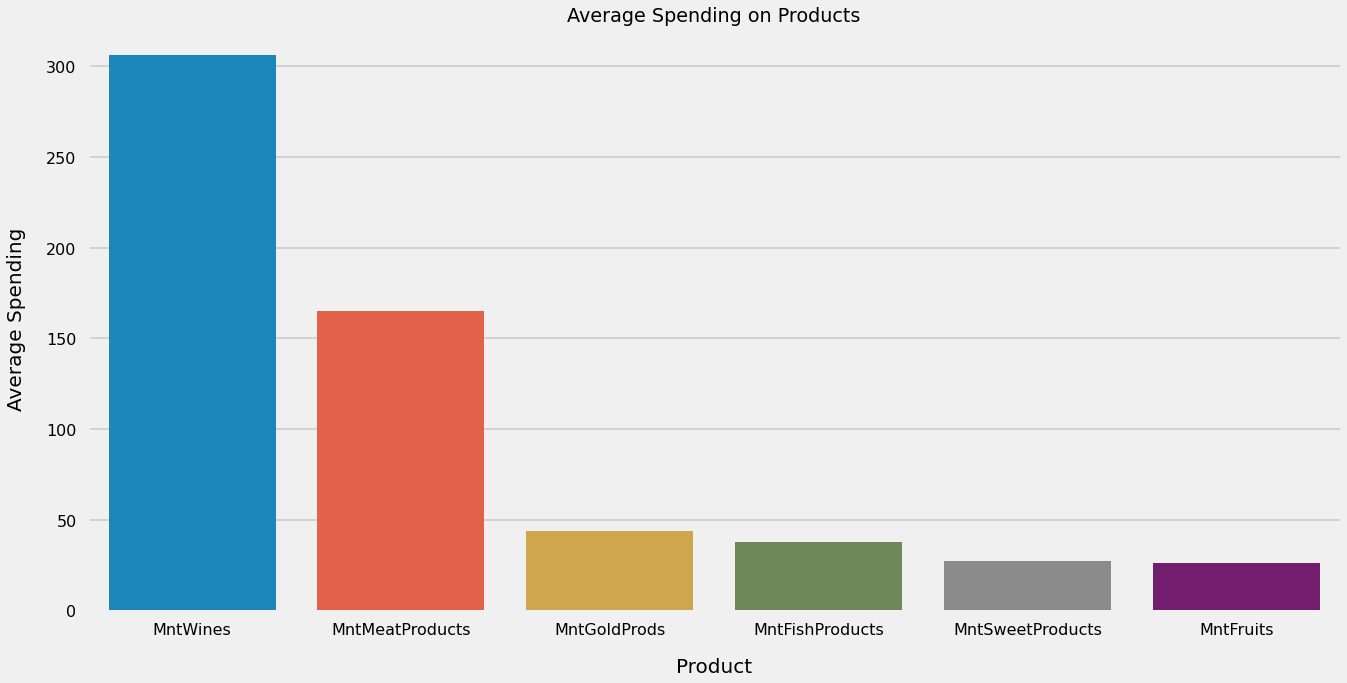

In [29]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

***Insights:***

1. Wine and Meats products are the most famous products among the customers

2. Sweets and Fruits are not being purchased often

#  3. Modelling Clusters 

Finding out the different segmenst of the customers based on different features of the customers data using the K-Means Clusters. Let's first drop the unnecessary columns from the data.

In [30]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)



X.head()

Income  Age  TotalSpendings
0  58138.0   58            1617
1  46344.0   61              27
2  71613.0   50             776
3  26646.0   31              53
4  58293.0   34             422

# Optimum Clusters Using Elbow Method
Choosing the optimum number of clusters based on the Elbow method

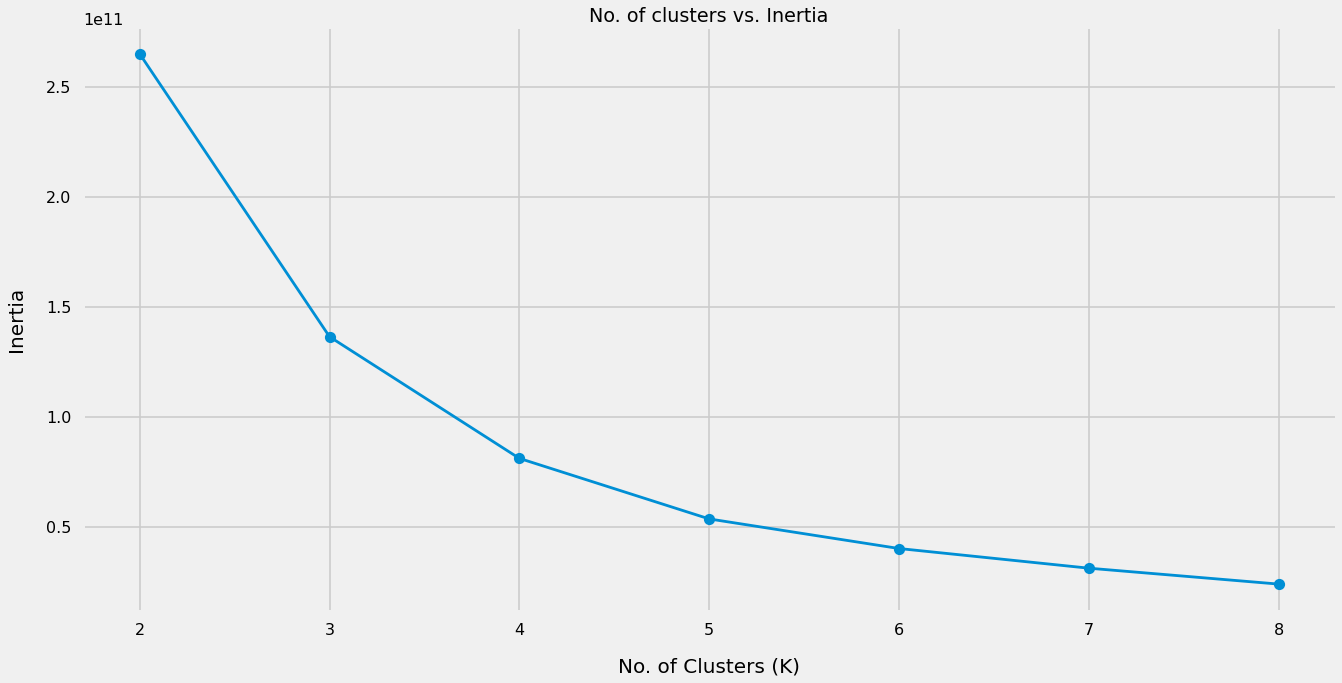

In [31]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

***Insights:***

Based on the above plot we will segment the customers into 4 clusters, as the inertia value donot decrase much after 4 clusters

In [32]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

# Clusters Identification
 identify the modelled 4 clusters from different features of the data

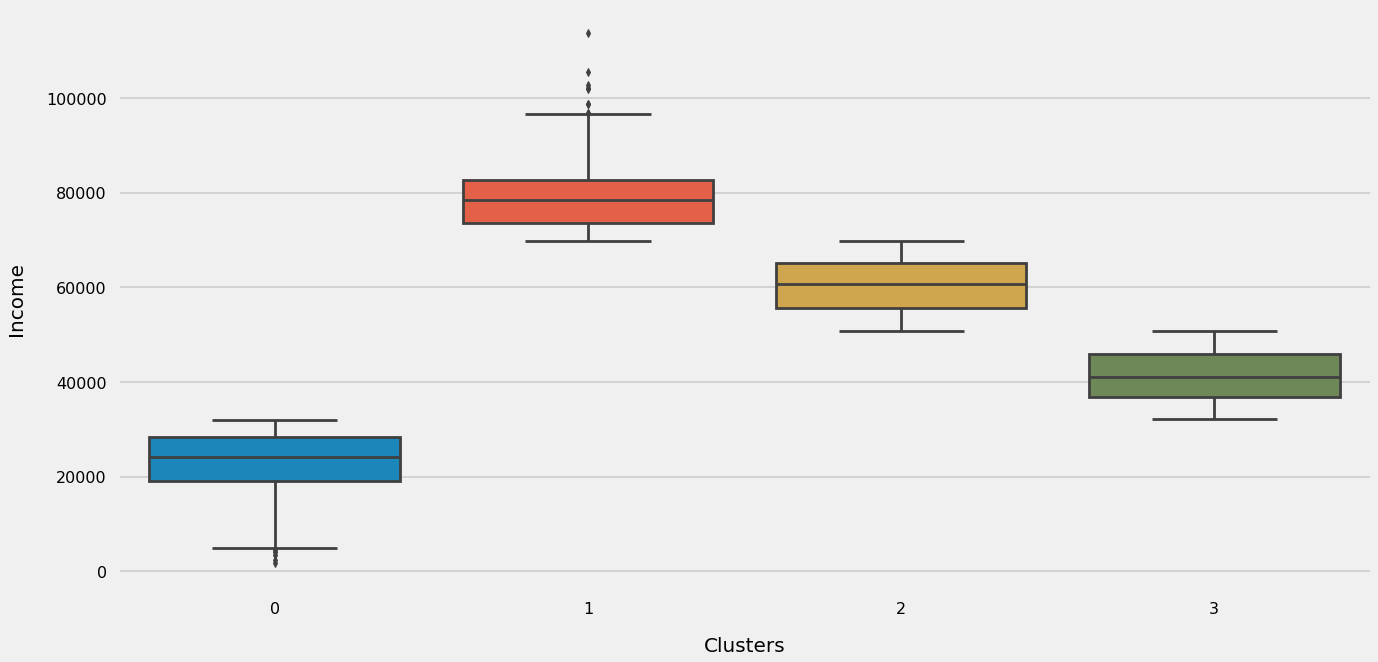

In [33]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

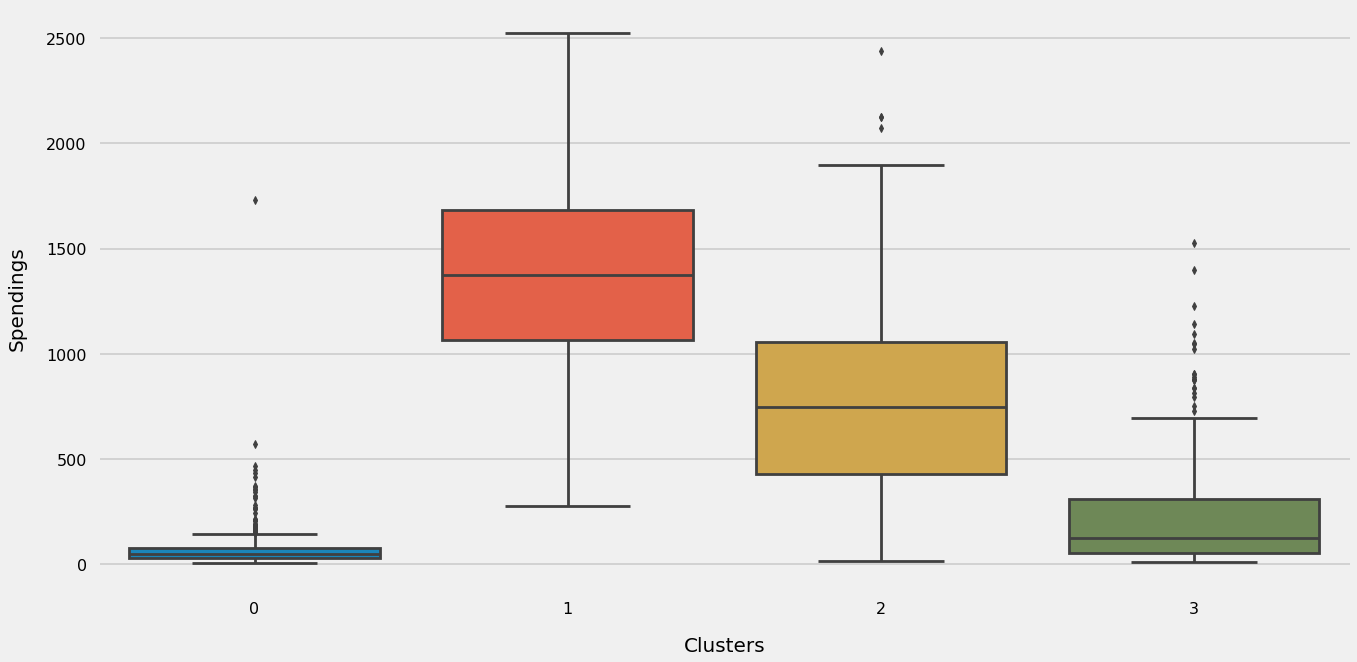

In [34]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

In [35]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20);

ValueError: Could not interpret input 'Month_Customer'

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20);

# Clusters Interpretation 

From the above analysis we can segment the customers into 4 groups based on their income and total spendings:

***Ace:***  The one's with highest earnings and highest spendings  

***King:*** The one's with high earnings and high spendings 

***Queen:*** The one's having low salary and less spendings

***Jack:*** The one's having lowest salary and least spendings

# Data Exploration: Clusters Based 
exploring the data again based on the modelled clusters to identify the spending habits of the customers

In [42]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Ace',
                                                             2: 'King',
                                                             3: 'Queen',
                                                             0: 'Jack'})

customer['clusters'] = customer_kmeans.clusters


customer['clusters']

0        King
1       Queen
2         Ace
3        Jack
4        King
        ...  
2235     King
2236     King
2237     King
2238     King
2239     King
Name: clusters, Length: 2205, dtype: object

In [43]:
#Unique Values in Clusters
cluster_counts = customer.clusters.value_counts()
cluster_counts

Queen    642
King     611
Ace      508
Jack     444
Name: clusters, dtype: int64

# Customers Distribution 

In [44]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

# Relationship: Income vs. Spendings 

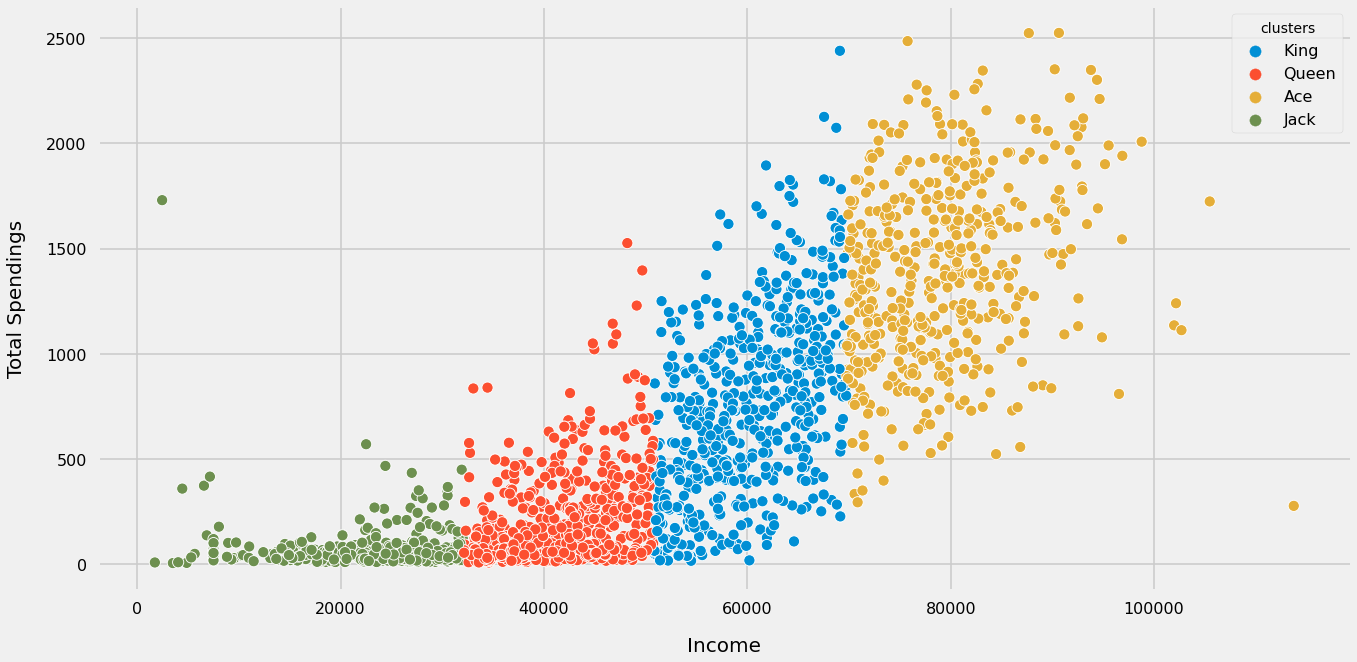

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

***Insights:***

1. The 4 clusters can easily be identified from the above plot
2. Those earning more are also spending more

# Spending Habits by Clusters 

<Figure size 2160x1080 with 0 Axes>

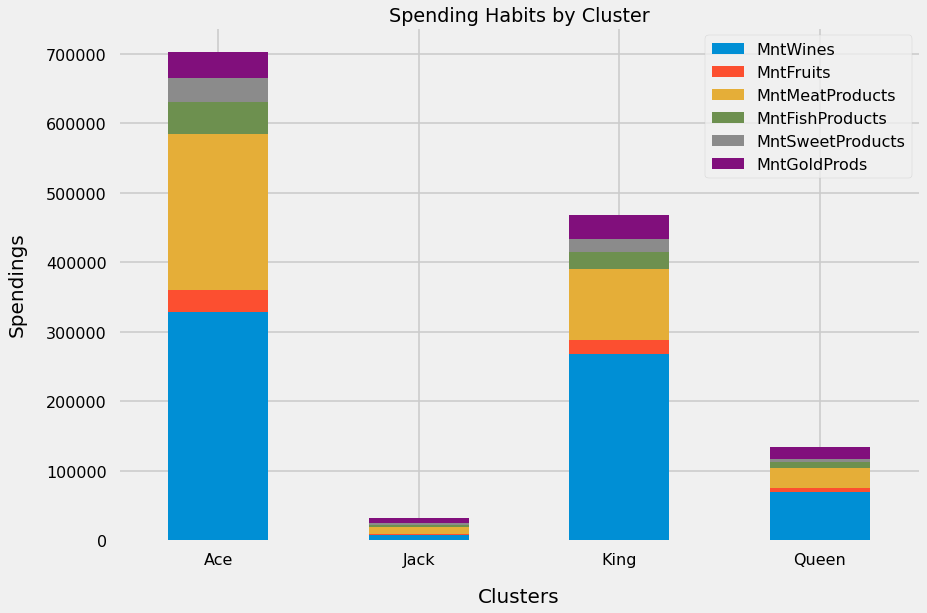

In [46]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

***Insights:***
Customers from all the segments have spent most of their money on Wine and Meat products

# Purchasing Habits by Clusters

In [47]:
#Group Clusters and Purchasing
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
clusters                                                            
Ace                     691             2702                 2920   
Jack                    904              863                  202   
King                   1816             3439                 2038   
Queen                  1701             2038                  673   

          NumStorePurchases  NumWebVisitsMonth  
clusters                                        
Ace                    4292               1454  
Jack                   1280               3149  
King                   4669               3053  
Queen                  2600               4112

<Figure size 2160x1080 with 0 Axes>

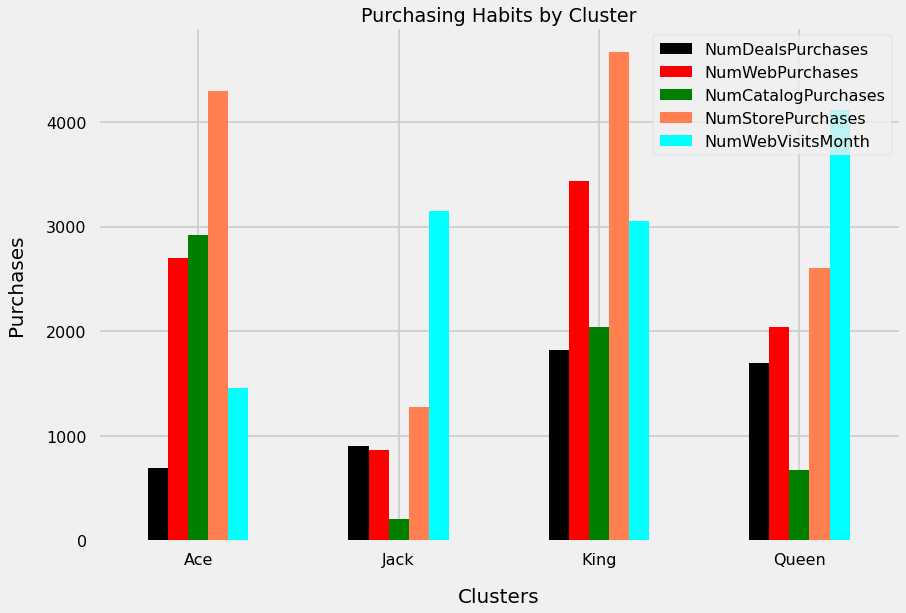

In [48]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');